<a href="https://colab.research.google.com/github/JosePabloGFnl/Tensorflow-Practice/blob/main/Module4NeuralNetworks.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Neural Networks 
#they take a set of inputs converting them into an output
#a nn is made of layers
#(Example: we want this value to be betweeen 0 and 1)
#(the sum of every value would be 1)
#each of these lines are numeric values between 0 and 1
#to solve a prediction based on a 28x28 image, you need 784 inputs

#INPUT LAYER---HIDDEN LAYER---OUTPUT LAYER
#*********************************************************************************
#                     (x,y,z) -> [red,blue]
                   
# -> x o(2) \x1 (these are connections, making it a densly connected neutal network)
#      -----------o1\            
# -> y o(2) /y1 \x2  -------------O [0,1] if it's closer to 0, red; if it's closer to 1, blue
#     \y2---------o2/                Sidmiud(o1w0 + o2w1 + biaso) = [0,1]
# -> z o(2) /z1/z2
#                  biaso (connected to the output)

#                   o1 = sum of i=0 to n (wixi+biaso)
# biaso (this one connects to each hidden one, except it's not an output but a constant numeric value)
#*********************************************************************************

#As a result, it will consider the neural network's efficiency with the LOSS function

In [ ]:
#Optimizer

#does the algoritm of gradient descent and others for us. 
#it's a more advanced machine learning tecnique

In [ ]:
%tensorflow_version 2.x

import tensorflow as tf
from tensorflow import keras

import numpy as np
import matplotlib.pyplot as plt

In [ ]:
fasion_mnist = keras.datasets.fashion_mnist #load dataset

(train_images, train_labels), (test_images, test_labels) = fasion_mnist.load_data() #split into testing and training

4431872/4422102 [==============================] - 0s 0us/step


In [ ]:
train_images.shape #what out dataset looks like. We hace 60,000 imaged of 28x28 pixels

(60000, 28, 28)

In [ ]:
type(train_images)

numpy.ndarray

In [ ]:
train_images[0,23,23] #for one pixel

194

In [ ]:
print(train_images) #for multiple pixels

[[[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 ...

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]]


In [ ]:
#range from 0 - 255, being black - white

In [ ]:
train_labels[:10] #first 10 training labels

array([9, 0, 0, 3, 0, 2, 7, 2, 5, 5], dtype=uint8)

In [ ]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

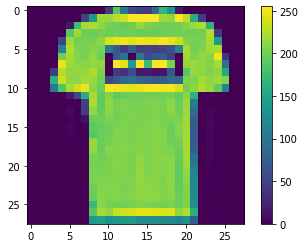

In [ ]:
#what some of the images look like
plt.figure()
plt.imshow(train_images[1])
plt.colorbar()
plt.grid(False)
plt.show()
#pretty cool!!!

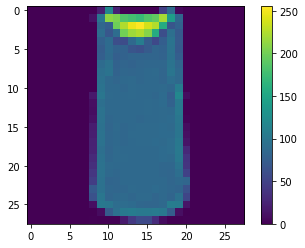

In [ ]:
plt.figure()
plt.imshow(train_images[2])
plt.colorbar()
plt.grid(False)
plt.show()

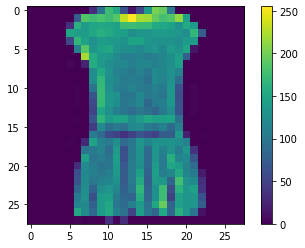

In [ ]:
plt.figure()
plt.imshow(train_images[3])
plt.colorbar()
plt.grid(False)
plt.show()

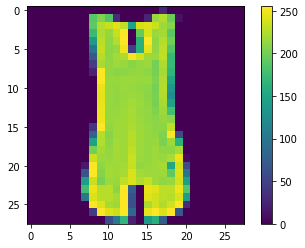

In [ ]:
plt.figure()
plt.imshow(train_images[4])
plt.colorbar()
plt.grid(False)
plt.show()

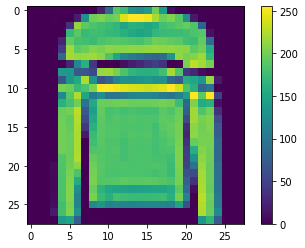

In [ ]:
plt.figure()
plt.imshow(train_images[5])
plt.colorbar()
plt.grid(False)
plt.show()

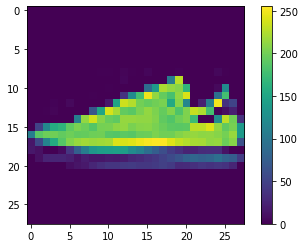

In [ ]:
plt.figure()
plt.imshow(train_images[6])
plt.colorbar()
plt.grid(False)
plt.show()

In [ ]:
#---Data preprocessing---
#when we have missing data, we preprocess it
#we devide each value in the training and testing sets

train_images = train_images / 255.0

test_images = test_images / 255.0

In [ ]:
#---Building The Model---
#data is the hardest part in a nn, building the model is relatively easy
model = keras.Sequential([ #the information passes through the layers sequentially, we define the layers we want
      keras.layers.Flatten(input_shape=(28, 28)), #input layer (1)
      keras.layers.Dense(128, activation = 'relu'), #hidden layer (2)
      keras.layers.Dense(10, activation='softmax') #output layer (3), we have 10 classes, hence the 10 outputs, softmax will make sure that all of the values add up to 1
])
#to compile the model
model.compile(optimizer='adam',
              loss='sparse_catagorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
#to train the model
model.fit(train_images, train_labels, epochs=10)  # we pass the data, labels and epochs and watch the process

Epoch 1/10


ValueError: ignored

In [ ]:
#evaluating the model
#this is used for more accuracy
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=1) 

print('Test accuracy:', test_acc)

ValueError: ignored

In [ ]:
#---Making Predictions---
predictions = model.predict(test_images)
print(predictions)

[[0.0587722  0.13267183 0.08871231 ... 0.2116507  0.08431163 0.10239082]
 [0.06976631 0.04021795 0.07293011 ... 0.25414494 0.0663671  0.08870021]
 [0.05965994 0.14185114 0.07889271 ... 0.15236813 0.09896939 0.07061511]
 ...
 [0.06219289 0.11349773 0.09641783 ... 0.19348767 0.09070133 0.10944398]
 [0.04073719 0.10178237 0.09211823 ... 0.12793374 0.08973359 0.0952807 ]
 [0.07734656 0.12443822 0.11551423 ... 0.14489494 0.06924792 0.07628725]]


In [ ]:
print(predictions[0]) #to predict one image
#probability of distribution on our output layer

[0.0587722  0.13267183 0.08871231 0.03009697 0.09324894 0.0878757
 0.11026883 0.2116507  0.08431163 0.10239082]


In [ ]:
print(np.argmax(predictions[0])) #the max value in the array

7


Sneaker


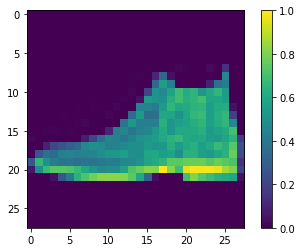

In [ ]:
print(class_names[np.argmax(predictions[0])]) #the class that the prediction is

plt.figure()
plt.imshow(test_images[0])
plt.colorbar()
plt.grid(False)
plt.show()
#you can experiment with others changing the 0 to another number

Pick a number: 34


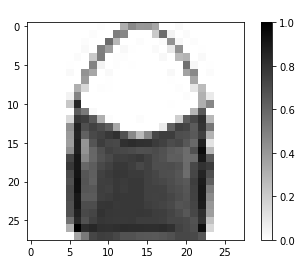

In [ ]:
#---Verifying predictions---
#code from tenserflow
#show us what the model is vs the prediction
COLOR = 'white'
plt.rcParams['text.color'] = COLOR
plt.rcParams['axes.labelcolor'] = COLOR

def predict(model, image, correct_label):
  class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
  prediction = model.predict(np.array([image]))
  predicted_class = class_names[np.argmax(prediction)]

  show_image(image, class_names[correct_label], predicted_class)


def show_image(img, label, guess):
  plt.figure()
  plt.imshow(img, cmap=plt.cm.binary)
  plt.title("Excpected: " + label)
  plt.xlabel("Guess: " + guess)
  plt.colorbar()
  plt.grid(False)
  plt.show()


def get_number():
  while True:
    num = input("Pick a number: ")
    if num.isdigit():
      num = int(num)
      if 0 <= num <= 1000:
        return int(num)
    else:
      print("Try again...")

num = get_number()
image = test_images[num]
label = test_labels[num]
predict(model, image, label)